In [31]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.rcParams['font.weight']='normal'

mpl.rcParams['font.size']=16 #10 #16 pour posts
mpl.rcParams['legend.fontsize']=12 #10 12 pour posts
#inline backend pour voir les figures dans le frontend notebook https://ipython.readthedocs.io/en/stable/interactive/plotting.html

In [61]:
fname='results/'


sampkoh=pd.DataFrame(data=np.loadtxt(fname+"sampkoh.gnu"),columns=['t1','edm','exp','lcor'])
sampopt=pd.DataFrame(data=np.loadtxt(fname+"sampopt.gnu"),columns=['t1','edm','exp','lcor'])
sampfb=pd.DataFrame(data=np.loadtxt(fname+"sampbayes.gnu"),columns=['t1','edm','exp','lcor','tr','ol','ll'])



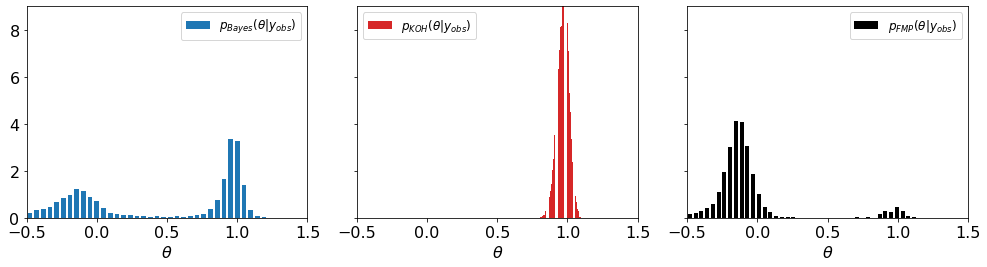

In [6]:

nbins=40
xlim=[-0.5,1.5]
ylim=[0,9]
#plot d'histogrammes
fig,axs=plt.subplots(figsize=[14,4],ncols=3,nrows=1,sharey=True)
axs[0].hist(sampfb['t1'],bins=nbins,density=True,color='tab:blue',rwidth=0.7,label=r'$p_{Bayes}(\theta|y_{obs})$')
axs[1].hist(sampkoh['t1'],bins=nbins,density=True,color='tab:red',rwidth=0.7,label=r'$p_{KOH}(\theta|y_{obs})$')
axs[2].hist(sampopt['t1'],bins=nbins,density=True,color='black',rwidth=0.7,label=r'$p_{FMP}(\theta|y_{obs})$')
axs[0].set_ylim(ylim)
axs[0].set_xlim(xlim)
axs[1].set_xlim(xlim)
axs[2].set_xlim(xlim)
axs[0].set_xlabel(r'$\theta$')
axs[1].set_xlabel(r'$\theta$')
axs[2].set_xlabel(r'$\theta$')
axs[0].legend()
axs[1].legend()
axs[2].legend()
plt.tight_layout()

In [27]:
#affichage de la distribution des poids
weights=pd.DataFrame(data=np.loadtxt(fname+"weights.gnu"),columns=['t1','w'])
weightsnew=pd.DataFrame(data=np.loadtxt(fname+"weightsnew.gnu"),columns=['t1','w'])
kde=pd.DataFrame(data=np.loadtxt(fname+"kde.gnu"),columns=['t1','kde'])
res1=pd.DataFrame(data=np.loadtxt(fname+"resamples0.gnu"),columns=['t1'])
res2=pd.DataFrame(data=np.loadtxt(fname+"resamples1.gnu"),columns=['t1'])
res3=pd.DataFrame(data=np.loadtxt(fname+"resamples2.gnu"),columns=['t1'])
res4=pd.DataFrame(data=np.loadtxt(fname+"resamples3.gnu"),columns=['t1'])
res5=pd.DataFrame(data=np.loadtxt(fname+"resamples4.gnu"),columns=['t1'])

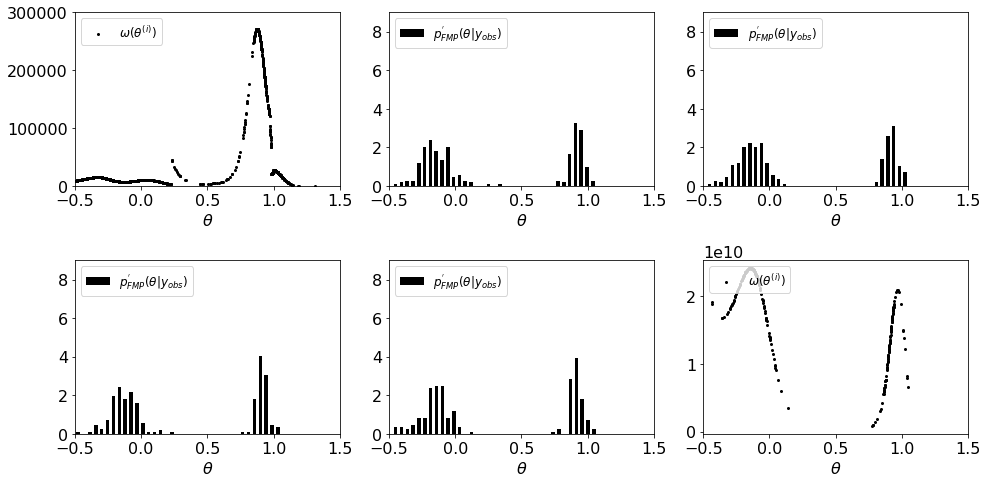

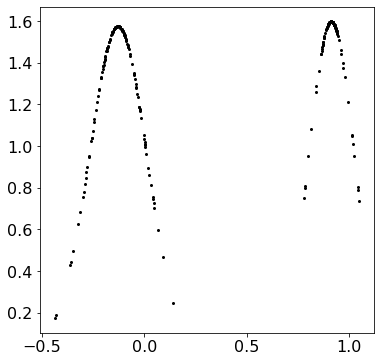

In [29]:
nbins=35
fig,axs=plt.subplots(figsize=[14,7],ncols=3,nrows=2)
ylim=[0,9]
axs[0,0].scatter(weights['t1'],weights['w'],color='black',s=4,label=r'$\omega(\theta^{(i)})$')
axs[0,1].hist(res1['t1'],bins=nbins,density=True,rwidth=0.6,color='black',label=r"$p^{'}_{FMP}(\theta|y_{obs})$")
axs[0,2].hist(res2['t1'],bins=nbins,density=True,rwidth=0.6,color='black',label=r"$p^{'}_{FMP}(\theta|y_{obs})$")
axs[1,0].hist(res3['t1'],bins=nbins,density=True,rwidth=0.6,color='black',label=r"$p^{'}_{FMP}(\theta|y_{obs})$")
axs[1,1].hist(res4['t1'],bins=nbins,density=True,rwidth=0.6,color='black',label=r"$p^{'}_{FMP}(\theta|y_{obs})$")
axs[1,2].scatter(weightsnew['t1'],weightsnew['w'],color='black',s=4,label=r'$\omega(\theta^{(i)})$')

axs[0,0].set_ylim([0,30e4])
axs[0,0].legend(loc='upper left')
axs[0,1].legend(loc='upper left')
axs[0,2].legend(loc='upper left')
axs[1,0].legend(loc='upper left')
axs[1,1].legend(loc='upper left')
axs[1,2].legend(loc='upper left')

axs[0,1].set_ylim(ylim)
axs[0,2].set_ylim(ylim)
axs[1,0].set_ylim(ylim)
axs[1,1].set_ylim(ylim)

axs[0,0].set_xlim(xlim)
axs[0,1].set_xlim(xlim)
axs[0,2].set_xlim(xlim)
axs[1,0].set_xlim(xlim)
axs[1,1].set_xlim(xlim)
axs[1,2].set_xlim(xlim)

axs[0,0].set_xlabel(r'$\theta$')
axs[0,1].set_xlabel(r'$\theta$')
axs[0,2].set_xlabel(r'$\theta$')
axs[1,0].set_xlabel(r'$\theta$')
axs[1,1].set_xlabel(r'$\theta$')
axs[1,2].set_xlabel(r'$\theta$')

plt.tight_layout()

plt.figure(figsize=[6,6])
plt.scatter(kde['t1'],kde['kde'],color='black',s=4)


In [92]:
#test. combien de thetas sont après 0.5 dans le premier weights ?
r=weightsnew
print(r[r['t1']>0.5])
print(140/250*100)

           t1             w
2    0.904529  1.224750e+10
3    0.901708  1.170693e+10
5    0.928362  1.683802e+10
8    0.877486  7.542773e+09
9    0.869418  6.405064e+09
..        ...           ...
228  0.777014  8.326170e+08
234  0.924933  1.620652e+10
241  0.876704  7.426539e+09
245  0.869624  6.432411e+09
246  0.937277  1.835206e+10

[110 rows x 2 columns]
56.00000000000001


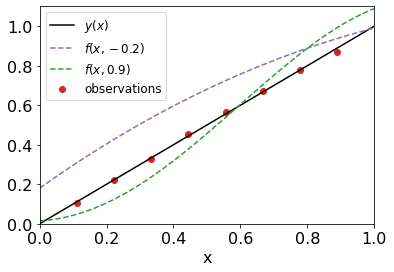

In [146]:
#plot pour donner une idée du modèle
def f(x,theta):
    return x*np.sin(2*x*theta)+(x+0.15)*(1-theta)

obs=pd.DataFrame(data=np.loadtxt(fname+"obs.gnu"),columns=['x','y'])
X=np.linspace(0,1,100)
fig,ax=plt.subplots(figsize=[6,4],ncols=1,nrows=1)
ax.scatter(obs['x'],obs['y'],color='tab:red',label='observations')
ax.plot(X,X,color='black',label=r'$y(x)$')
ax.plot(X,f(X,-0.2),color='tab:purple',label=r'$f(x,-0.2)$',linestyle='--')
ax.plot(X,f(X,0.9),color='tab:green',label=r'$f(x,0.9)$',linestyle='--')
ax.set_xlim([0,1])
ax.set_ylim([0,1.1])
ax.set_xlabel('x')

ax.legend()



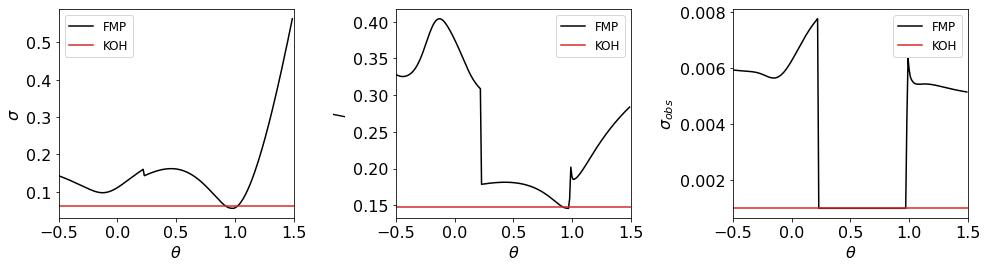

In [47]:
#affichage des hyperparamètres optimaux
hparsopt=pd.DataFrame(data=np.loadtxt(fname+"hparsoptfine.gnu"),columns=['t1','edm','exp','lcor'])

skoh=0.0612
sobskoh=1e-3
lkoh=0.147

fig,axs=plt.subplots(figsize=[14,4],ncols=3,nrows=1)
axs[0].plot(hparsopt['t1'],hparsopt['edm'],color='black',label=r'FMP')
axs[1].plot(hparsopt['t1'],hparsopt['lcor'],color='black',label=r'FMP')
axs[2].plot(hparsopt['t1'],hparsopt['exp'],color='black',label=r'FMP')

axs[0].plot([xlim[0],xlim[1]],[skoh,skoh],color='tab:red',label=r'KOH')
axs[1].plot([xlim[0],xlim[1]],[lkoh,lkoh],color='tab:red',label=r'KOH')
axs[2].plot([xlim[0],xlim[1]],[sobskoh,sobskoh],color='tab:red',label=r'KOH')



axs[0].set_xlim(xlim)
axs[1].set_xlim(xlim)
axs[2].set_xlim(xlim)
axs[0].set_xlabel(r'$\theta$')
axs[1].set_xlabel(r'$\theta$')
axs[2].set_xlabel(r'$\theta$')
axs[0].set_ylabel(r'$\sigma$')
axs[1].set_ylabel(r'$l$')
axs[2].set_ylabel(r'$\sigma_{obs}$')
axs[0].legend()
axs[1].legend()
axs[2].legend()
plt.tight_layout()


Text(0.25, 0.05, '$56\\%$ of samples')

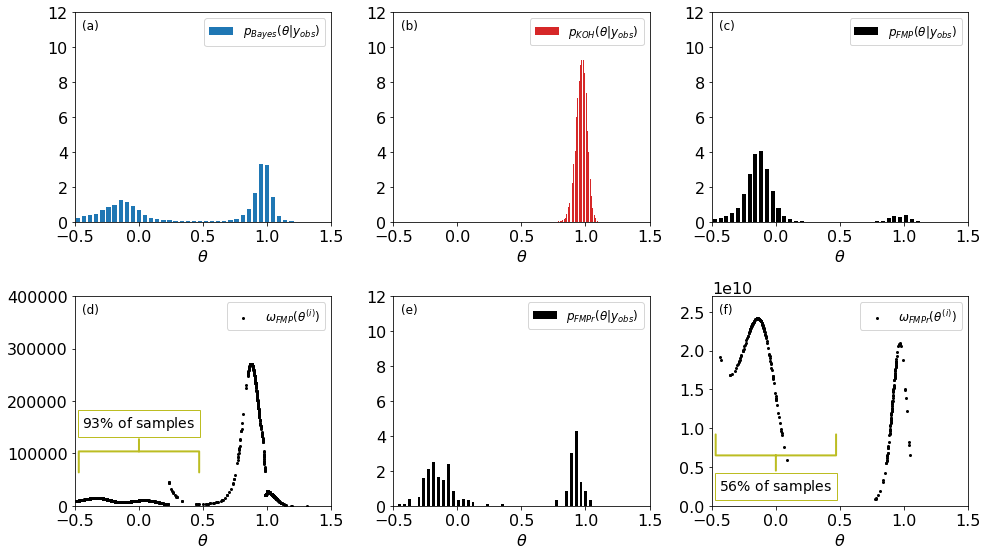

In [99]:
def setlabel(ax, label, loc=2, borderpad=0.6, **kwargs):
    legend = ax.get_legend()
    if legend:
        ax.add_artist(legend)
    line, = ax.plot(np.NaN,np.NaN,color='none',label=label)
    label_legend = ax.legend(handles=[line],loc=loc,handlelength=0,handleheight=0,handletextpad=0,borderaxespad=0,borderpad=borderpad,frameon=False,**kwargs)
    label_legend.remove()
    ax.add_artist(label_legend)
    line.remove()

#affichage des posts + weights sur une seule figure, pour que ça soit plus clair.
#loading
sampkoh=pd.DataFrame(data=np.loadtxt(fname+"sampkoh.gnu"),columns=['t1','edm','exp','lcor'])
sampopt=pd.DataFrame(data=np.loadtxt(fname+"sampopt.gnu"),columns=['t1','edm','exp','lcor'])
sampfb=pd.DataFrame(data=np.loadtxt(fname+"sampbayes.gnu"),columns=['t1','edm','exp','lcor','tr','ol','ll'])
weights=pd.DataFrame(data=np.loadtxt(fname+"weights.gnu"),columns=['t1','w'])
weightsnew=pd.DataFrame(data=np.loadtxt(fname+"weightsnew.gnu"),columns=['t1','w'])
res1=pd.DataFrame(data=np.loadtxt(fname+"resamples0.gnu"),columns=['t1'])

#plots
nbins=40
xlim=[-0.5,1.5]
ylim=[0,12]
#plot d'histogrammes
fig,axs=plt.subplots(figsize=[14,8],ncols=3,nrows=2)
axs[0,0].hist(sampfb['t1'],bins=nbins,density=True,color='tab:blue',rwidth=0.7,label=r'$p_{Bayes}(\theta|y_{obs})$')
axs[0,1].hist(sampkoh['t1'],bins=30,density=True,color='tab:red',rwidth=0.7,label=r'$p_{KOH}(\theta|y_{obs})$')
axs[0,2].hist(sampopt['t1'],bins=nbins,density=True,color='black',rwidth=0.7,label=r'$p_{FMP}(\theta|y_{obs})$')
axs[0,0].set_ylim(ylim)
axs[0,1].set_ylim(ylim)
axs[0,2].set_ylim(ylim)
axs[1,1].set_ylim(ylim)
axs[0,0].set_xlim(xlim)
axs[0,1].set_xlim(xlim)
axs[0,2].set_xlim(xlim)
axs[1,0].set_xlim(xlim)
axs[1,1].set_xlim(xlim)
axs[1,2].set_xlim(xlim)
axs[0,0].set_xlabel(r'$\theta$')
axs[0,1].set_xlabel(r'$\theta$')
axs[0,2].set_xlabel(r'$\theta$')
axs[0,0].legend(loc='upper right')
axs[0,1].legend(loc='upper right')
axs[0,2].legend(loc='upper right')

axs[1,0].scatter(weights['t1'],weights['w'],color='black',s=4,label=r'$\omega_{FMP}(\theta^{(i)})$')
axs[1,1].hist(res1['t1'],bins=nbins,density=True,rwidth=0.6,color='black',label=r"$p_{FMPr}(\theta|y_{obs})$")
axs[1,2].scatter(weightsnew['t1'],weightsnew['w'],color='black',s=4,label=r'$\omega_{FMPr}(\theta^{(i)})$')
axs[1,0].legend(loc='upper right')
axs[1,1].legend(loc='upper right')
axs[1,2].legend(loc='upper right')
axs[1,0].set_xlabel(r'$\theta$')
axs[1,1].set_xlabel(r'$\theta$')
axs[1,2].set_xlabel(r'$\theta$')

axs[1,0].set_ylim([0,4e5])
axs[1,2].set_ylim([0,2.7e10])

setlabel(axs[0,0], '(a)')
setlabel(axs[0,1], '(b)')
setlabel(axs[0,2], '(c)')
setlabel(axs[1,0], '(d)')
setlabel(axs[1,1], '(e)')
setlabel(axs[1,2], '(f)')

plt.tight_layout()

axs[1,0].annotate(r'$93\%$ of samples', xy=(0.25, 0.25), xytext=(0.25, 0.35), xycoords='axes fraction', 
            fontsize=14, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white',color='tab:olive'),
            arrowprops=dict(arrowstyle='-[, widthB=4.3, lengthB=1.5', lw=2.0,color='tab:olive'))

axs[1,2].annotate(r'$56\%$ of samples', xy=(0.25, 0.25), xytext=(0.25, 0.05), xycoords='axes fraction', 
            fontsize=14, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white',color='tab:olive'),
            arrowprops=dict(arrowstyle='-[, widthB=4.3, lengthB=1.5', lw=2.0,color='tab:olive'))


[   0    1    2 ... 9997 9998 9999]


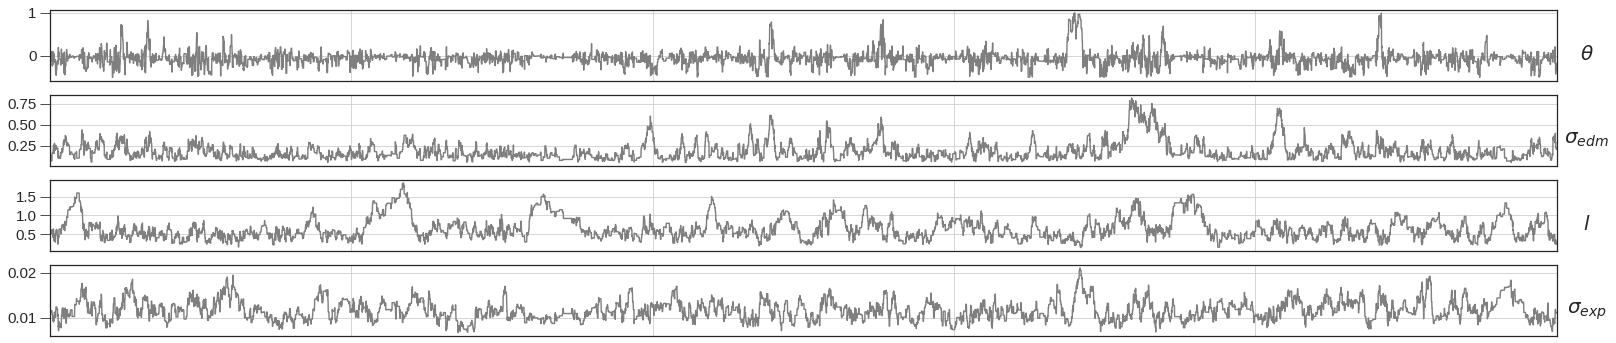

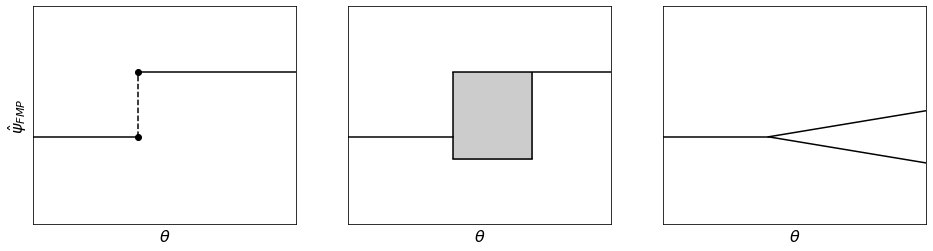

In [149]:
#correspondence correspondance upper hemi-continuous
def f1(x):
    return 0.4*np.ones(np.size(x))
def f2(x):
    return 0.7*np.ones(np.size(x))

X1=np.linspace(0,0.4,100)
X2=np.linspace(0.4,1,100)
fig,axs=plt.subplots(figsize=[16,4],ncols=3,nrows=1,sharey=True,sharex=True)

axs[0].get_yaxis().set_ticks([])
axs[0].get_xaxis().set_ticks([])
axs[0].plot(X1,f1(X1),color='black',label=r'$y(x)$')
axs[0].plot(X2,f2(X2),color='black',label=r'$y(x)$')
axs[0].scatter(0.4,f1(0.4),color='black')
axs[0].scatter(0.4,f2(0.4),color='black')
axs[0].vlines(0.4,f1(0.4),f2(0.4),color='black',linestyle='dashed')
axs[0].set_xlim([0,1])
axs[0].set_ylim([0,1])
axs[0].set_xlabel(r'$\theta$')
axs[1].set_xlabel(r'$\theta$')
axs[2].set_xlabel(r'$\theta$')
axs[0].set_ylabel(r'$\hat{\psi}_{FMP}$')

def f3(x):
    return 0.3*np.ones(np.size(x))

axs[1].plot(X1,f1(X1),color='black',label=r'$y(x)$')
a=np.linspace(0.4,0.7,100)
axs[1].fill_between(a,f3(a),f2(a),color='black',alpha=0.2)
axs[1].plot(X2,f2(X2),color='black',label=r'$y(x)$')
axs[1].plot(a,f3(a),color='black',label=r'$y(x)$')
axs[1].vlines(0.4,f3(0.4),f2(0.4),color='black')
axs[1].vlines(0.7,f3(0.7),f2(0.7),color='black')

def f4(x):
    return 0.32*np.ones(np.size(x))+0.2*x
def f5(x):
    return 0.48*np.ones(np.size(x))-0.2*x

axs[2].plot(X1,f1(X1),color='black',label=r'$y(x)$')
axs[2].plot(X2,f4(X2),color='black',label=r'$y(x)$')
axs[2].plot(X2,f5(X2),color='black',label=r'$y(x)$')



Text(0, 0.5, '$\\mathrm{p}(l)$')

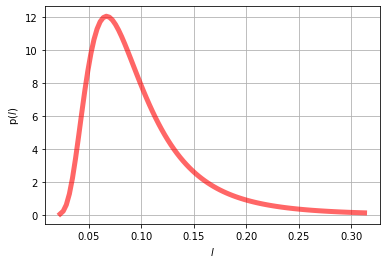

In [49]:
#affichage d'une loi inverse-gamma pour illustrer
from scipy.stats import invgamma
a=5
b=0.4 #ou 1/0.4 ?
fig, ax = plt.subplots(1, 1)
x = np.linspace(invgamma.ppf(0.0001, a,scale=b),invgamma.ppf(0.99, a,scale=b), 100)
ax.plot(x, invgamma.pdf(x, a,scale=b),'r-', lw=5, alpha=0.6, label='invgamma pdf')
plt.grid()
ax.set_xlabel(r'$l$')
ax.set_ylabel(r'$\mathrm{p}(l)$')
